# And that is your challenge.

Transform this regression problem into a binary classifier and clean up the feature set. You can choose whether or not to include nutritional information, but try to cut your feature set down to the 30 most valuable features.

Good luck!

When you've finished that, also take a moment to think about bias. Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There is. Several things in fact, but most glaringly is that we don't actually have a random sample. It could be, and probably is, that the people more likely to choose some kinds of recipes are more likely to give high reviews.

After all, people who eat chocolate might just be happier people.

# Challenge

In [18]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [19]:
# Transform this regression problem into a binary classifier...

raw_data = pd.read_csv('datasets/epicurious-recipes-with-rating-and-nutrition/epi_r.csv')

raw_data['perfect_5'] = 0
raw_data.loc[(raw_data['rating'] < 5), 'perfect_5'] = 1

In [20]:
# ...clean up the feature set

# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [21]:
raw_data = raw_data.dropna()

In [22]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,perfect_5
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [38]:
# Use Random Forest Classifier to score features

from sklearn.ensemble import RandomForestClassifier 

X = raw_data.drop(['perfect_5', 'title', 'rating'], 1)
Y = raw_data.perfect_5

rfc = RandomForestClassifier()
rfc.fit(X, Y)

feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances[0:30], '\n', feature_importances[0:30].index)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


                   importance
calories             0.060065
sodium               0.056620
fat                  0.047011
protein              0.045403
bon appétit          0.012365
gourmet              0.010810
summer               0.008458
vegetarian           0.007365
quick & easy         0.007320
wheat/gluten-free    0.007215
thanksgiving         0.006956
fall                 0.006684
onion                0.006417
sauce                0.006383
milk/cream           0.006211
winter               0.006004
herb                 0.005912
bake                 0.005896
kid-friendly         0.005722
kosher               0.005719
dairy free           0.005687
pescatarian          0.005684
dairy                0.005671
lemon                0.005626
egg                  0.005586
spring               0.005510
soy free             0.005428
tree nut free        0.005208
garlic               0.005057
peanut free          0.004966 
 Index(['calories', 'sodium', 'fat', 'protein', 'bon appétit', 'gourm

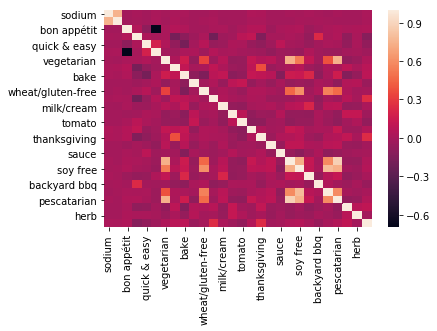

In [34]:
X = raw_data[['sodium', 'protein', 'bon appétit', 'summer',
       'quick & easy', 'gourmet', 'vegetarian', 'fall', 'bake', 'onion',
       'wheat/gluten-free', 'winter', 'milk/cream', 'garlic', 'tomato',
       'fruit', 'thanksgiving', 'kid-friendly', 'sauce', 'kosher', 'soy free',
       'egg', 'backyard bbq', 'tree nut free', 'pescatarian', 'roast', 'herb',
       'christmas']]

sns.heatmap(X.corr())

In [42]:
from sklearn.svm import SVC
svc = SVC()
X = raw_data[['sodium', 'protein', 'bon appétit', 'summer',
       'quick & easy', 'gourmet', 'vegetarian', 'fall', 'bake', 'onion',
       'wheat/gluten-free', 'winter', 'milk/cream', 'garlic', 'tomato',
       'fruit', 'thanksgiving', 'kid-friendly', 'sauce', 'kosher', 'soy free',
       'egg', 'backyard bbq', 'tree nut free', 'pescatarian', 'roast', 'herb',
       'christmas']]
Y = raw_data.perfect_5
svc.fit(X,Y)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [43]:
svc.score(X, Y)

0.8859051941502774

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, Y, cv=5)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

array([0.8673598 , 0.86983927, 0.86920895, 0.8685372 , 0.86759142])